Smoothing is a technique applied to remove fine variation between time steps. The goal of smoothing is to try and remove noise and better expose the actuals. 

Using moving average smoothing creates a new time series with values that are the average of the values in the raw data. The values are calculated with the window width. There are two types of moving averages: <b>Centered</b> and <b>Trailing</b>. 

### Assumptions

There are some assumptions moving averages take about the data. 
* The trend and seasonal components are removed
* The data is thus stationary.

#### Centered Moving Average

The value at (t) is calculated as the average of the observations (t - x) before and (t + x) after. For example, a center moving average with a window of 3 would be: 

mva(t) = avg((t - 1), t, (t + 1))

#### Trailing Moving Average

The value at (t) is calculated as the average of the observations (t - (x - 1), t). For example, the trailing moving average for a window of 3 would be: 

mva(t) = avg((t - 2), (t - 1), t)

In [9]:
from pandas import read_csv 
from matplotlib import pyplot 
import seaborn as sb
series = read_csv('Data/daily-total-female-births.csv', 
                  header=0, index_col=0, 
                  parse_dates=True, squeeze=True) 

Pandas <b>rolling({windowSize})</b> function will automatically group observations into a window.

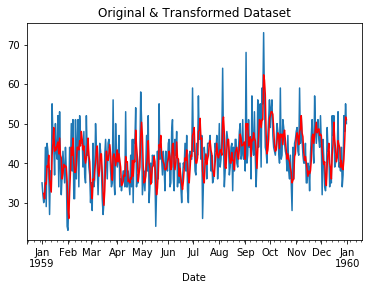

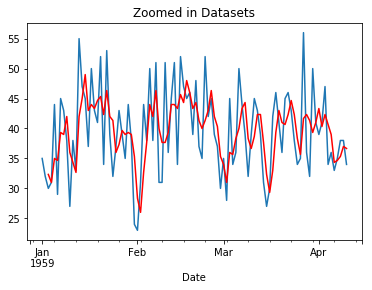

In [4]:
rolling = series.rolling(3)
rolling_mean = rolling.mean()
# plot original and transformed dataset 
pyplot.title('Original & Transformed Dataset')
series.plot() 
rolling_mean.plot(color='red') 
pyplot.show() 

# zoomed plot original and transformed dataset 
pyplot.title('Zoomed in Datasets')
series[:100].plot() 
rolling_mean[:100].plot(color='red') 
pyplot.show()

What do different rolling windows look like? As we see below, the higher the window, the more the graph is smoothed.

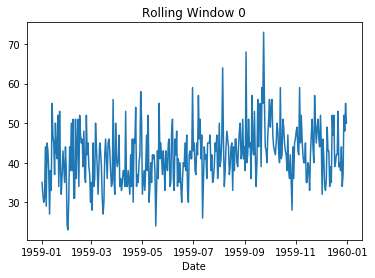

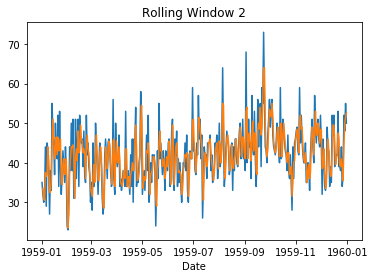

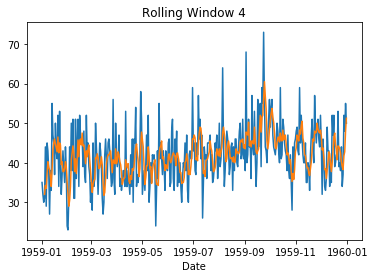

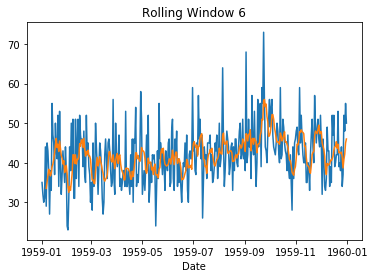

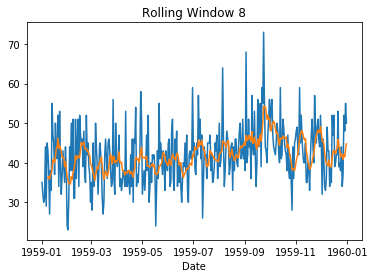

In [26]:
for x in range (10):
    if(x % 2 == 0):
        rolling_avg = series.rolling(x).mean()
        pyplot.title('Rolling Window {}'.format(x))
        sb.lineplot(series.index, series.values)
        sb.lineplot(rolling_avg.index, rolling_avg.values)
        pyplot.show()

Moving Averages can also be used as a naive predictino model. 